<a href="https://colab.research.google.com/github/gianlukas/modellazioneSistIng/blob/main/5_2_IntegraliDefiniti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Corso di Modellazione dei Sistemi Ingegneristici

prof. Gianluca Solazzo

email: gianluca.solazzo@unisalento.it

<a target="_blank" href="https://colab.research.google.com/github/mikexcohen/MasterMathByCodingInPython/blob/main/algebra_1/mathWithPython_algebra1_addPolys.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Integrazione Numerica

L'integrale definito rappresenta l'area (netta) al di sotto della curva del grafico di $y=f(x)$ nell'intervallo $[a,b]$.

$$
\int_a^b f(x) \, dx = \text{area netta sottesa dalla curva } y = f(x) \text{ su } [a,b]
$$

Il termine "netto" significa che l'area sopra l'asse $x$ è positiva e l'area sotto l'asse $x$ conta come area negativa.

Ad esempio, possiamo visualizzare l'integrale:

$$
\int_{\pi/2}^{3\pi/2} \left( \sin(0.2 x) + \sin(2x) + 1 \right) dx
$$

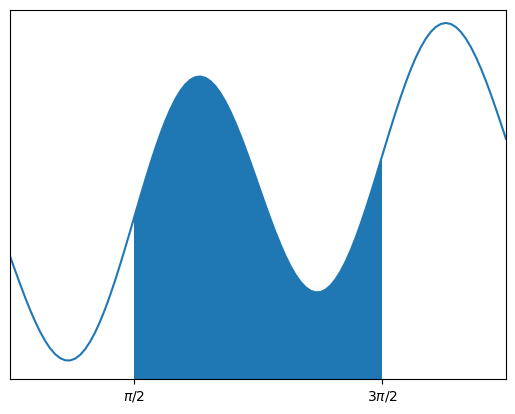

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(0.2*x) + np.sin(2*x) + 1

x = np.linspace(0,2*np.pi,100)
y = f(x)
plt.plot(x,y)

X = np.linspace(np.pi/2,3*np.pi/2,100)
Y = f(X)
plt.fill_between(X,Y)

plt.xticks([np.pi/2,3*np.pi/2],['$\pi/2$','$3\pi/2$']); plt.yticks([]);
plt.xlim([0,2*np.pi]);
plt.ylim([0,3]);
plt.show()

Dal teorema fondamentale del calcolo integrale sappiamo che, per calcolare l'integrale definito, possiamo procedere in questo modo:

$$
\int_0^{\pi/2} \cos(x) \, dx = \sin(\pi/2) - \sin(0) = 1
$$

Tuttavia, la maggior parte degli integrali definiti è impossibile da risolvere esattamente. Ad esempio, la famosa funzione di errore in probabilità

$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} dt
$$

è un integrale definito per il quale non esiste una formula esplicita.

L'idea alla base dell'integrazione numerica è quella di utilizzare semplici forme geometriche per approssimare l'area sotto la curva $y=f(x)$ per stimare integrali definiti.

Studiamo i metodi più semplici di integrazione numerica: le somme di Riemann, la regola del trapezio.

## Somme di Riemann

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Una somma di Riemann di una funzione $f(x)$ su una partizione

$$
x_0 = a < x_1 < \cdots < x_{N-1} < x_N = b
$$

è una somma della forma

$$
\sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i-1},x_i]
$$

dove ogni valore $x_i^* \in [x_{i-1},x_i]$ in ciascun sottointervallo è arbitrario.

Le somme di Riemann sono importanti perché forniscono un modo semplice per approssimare un integrale definito

$$
\int_a^b f(x) \, dx \approx \sum_{i=1}^N f(x_i^ * ) (x_i - x_{i-1}) \ \ , \ x_i^* \in [x_{i -1},x_i]
$$

Si noti che il prodotto $f(x_i^ * ) (x_i - x_{i-1})$ per ogni $i$ è l'area di un rettangolo di altezza $f(x_i^ * )$ e larghezza $x_i - x_{ i-1}$. Possiamo pensare ad una somma di Riemann come all'area dei rettangoli $N$ con altezze determinate dal grafico di $y=f(x)$.

Il valore $x_i^*$ scelto in ciascun sottointervallo è arbitrario, tuttavia esistono alcune scelte ovvie:

* Una somma di Riemann a *sinistra* si ha quando ogni $x_i^* = x_{i-1}$ è l'estremo sinistro del sottointervallo $[x_{i-1},x_i]$
* Una somma di Riemann a *destra* si ha quando ogni $x_i^* = x_i$ è l'estremo destro del sottointervallo $[x_{i-1},x_i]$
* Una somma di Riemann nel *punto medio* si ha quando ogni $x_i^* = (x_{i-1} + x_i)/2$ è il punto medio del sottointervallo $[x_{i-1},x_i]$

Visualizziamo i rettangoli nelle somme di Riemann sinistra, destra e nel punto medio della funzione

$$
f(x) = \frac{1}{1 + x^2}
$$

nell'intervallo $[0,5]$ con una partizione di dimensione $N=10$.

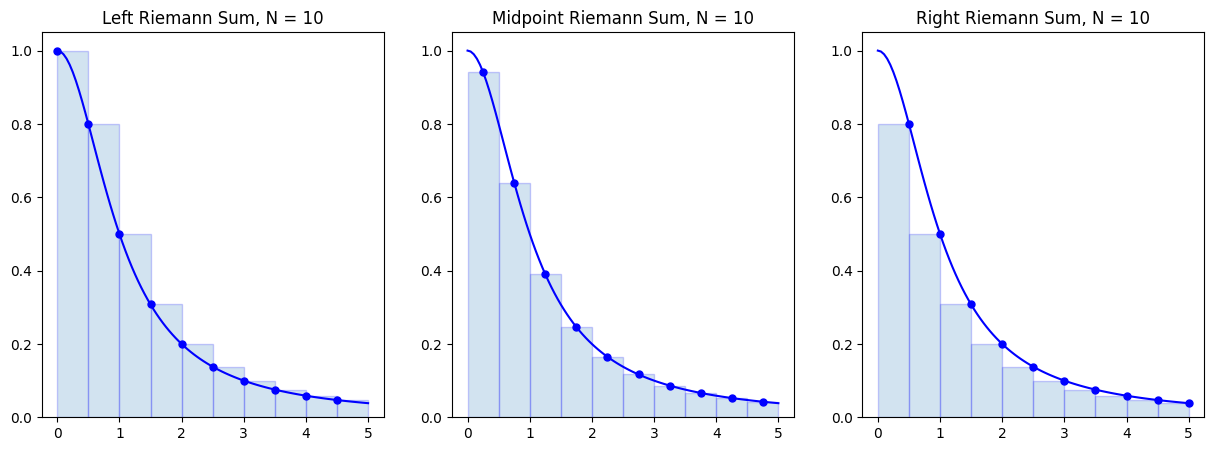

In [ ]:
f = lambda x : 1/(1+x**2)
a = 0; b = 5; N = 10
n = 10 # Use n*N+1 points to plot the function smoothly

x = np.linspace(a,b,N+1)
y = f(x)

X = np.linspace(a,b,n*N+1)
Y = f(X)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(X,Y,'b')
x_left = x[:-1] # Left endpoints
y_left = y[:-1]
plt.plot(x_left,y_left,'b.',markersize=10)
plt.bar(x_left,y_left,width=(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Left Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,2)
plt.plot(X,Y,'b')
x_mid = (x[:-1] + x[1:])/2 # Midpoints
y_mid = f(x_mid)
plt.plot(x_mid,y_mid,'b.',markersize=10)
plt.bar(x_mid,y_mid,width=(b-a)/N,alpha=0.2,edgecolor='b')
plt.title('Midpoint Riemann Sum, N = {}'.format(N))

plt.subplot(1,3,3)
plt.plot(X,Y,'b')
x_right = x[1:] # Left endpoints
y_right = y[1:]
plt.plot(x_right,y_right,'b.',markersize=10)
plt.bar(x_right,y_right,width=-(b-a)/N,alpha=0.2,align='edge',edgecolor='b')
plt.title('Right Riemann Sum, N = {}'.format(N))

plt.show()

Si noti che quando la funzione $f(x)$ decresce su $[a,b]$ gli estremi di sinistra danno una sovrastima dell'integrale $\int_a^b f(x) dx$ e gli estremi di destra danno una sottostima. È vero il contrario quando la funzione è crescente.

Calcoliamo il valore di ciascuna delle somme di Riemann:

In [ ]:
dx = (b-a)/N
x_left = np.linspace(a,b-dx,N)
x_midpoint = np.linspace(dx/2,b - dx/2,N)
x_right = np.linspace(dx,b,N)

print("Partition with",N,"subintervals.")
left_riemann_sum = np.sum(f(x_left) * dx)
print("Left Riemann Sum:",left_riemann_sum)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:",midpoint_riemann_sum)

right_riemann_sum = np.sum(f(x_right) * dx)
print("Right Riemann Sum:",right_riemann_sum)

Partition with 10 subintervals.
Left Riemann Sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


Mentre il valore esatto è:

$$
\int_0^5 \frac{1}{1 + x^2} dx = \arctan(5)
$$

e possiamo confrontare le somme di Riemann con il valore esatto

In [ ]:
I = np.arctan(5)
print(I)

1.373400766945016


In [ ]:
print("Left Riemann Sum Error:",np.abs(left_riemann_sum - I))
print("Midpoint Riemann Sum:",np.abs(midpoint_riemann_sum - I))
print("Right Riemann Sum:",np.abs(right_riemann_sum - I))

Left Riemann Sum Error: 0.24008792966970915
Midpoint Riemann Sum: 0.00014266137164820059
Right Riemann Sum: 0.24068130109952168


## La regola del Trapezioide

L'integrale definito di $f(x)$ è uguale all'area (netta) sottesa dalla curva $y=f(x)$ nell'intervallo $[a,b]$. Riemann somma gli integrali definiti approssimati utilizzando le somme dei rettangoli per approssimare l'area.

La regola del trapezio fornisce una migliore approssimazione di un integrale definito sommando le aree dei trapezi che collegano i punti

$$
(x_{i-1},0), (x_i,0), (x_{i-1},f(x_{i-1})), (x_i,f(x_i))
$$

per ogni sottointervallo $[x_{i-1},x_i]$ di una partizione.

Nota che l'area di ciascun trapezio è la somma di un rettangolo e di un triangolo

$$
(x_i - x_{i-1}) f(x_{i-1}) + \frac{1}{2}(x_i - x_{i-1}) (f(x_i) - f(x_{i- 1})) = \frac{1}{2}(f(x_i) + f(x_{i-1}))(x_i - x_{i-1})
$$

Ad esempio, possiamo utilizzare un singolo trapezio per approssimare:

$$
\int_0^1 e^{-x^2} \, dx
$$

Innanzitutto, tracciamo la curva $y = e^{-x^2}$ e il trapezio sull'intervallo $[0,1]$:

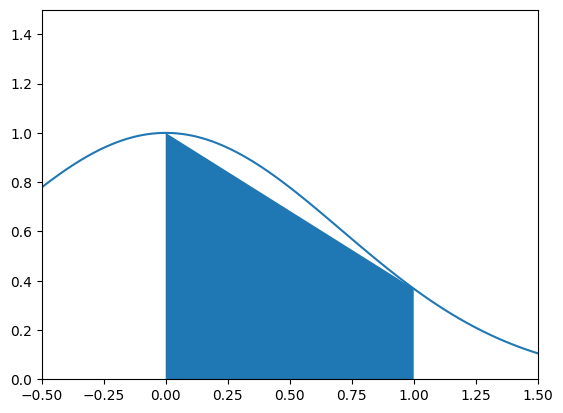

In [ ]:
x = np.linspace(-0.5,1.5,100)
y = np.exp(-x**2)
plt.plot(x,y)

x0 = 0; x1 = 1;
y0 = np.exp(-x0**2); y1 = np.exp(-x1**2);
plt.fill_between([x0,x1],[y0,y1])

plt.xlim([-0.5,1.5]); plt.ylim([0,1.5]);
plt.show()

Approssima l'integrale per l'area del trapezio:

In [ ]:
A = 0.5*(y1 + y0)*(x1 - x0)
print("Trapezoid area:", A)

Trapezoid area: 0.6839397205857212


### Definizione

La **regola del trapezio** per sottointervalli $N$ di $[a,b]$ di uguale lunghezza è

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1}))
$$

dove $\Delta x = (b - a)/N$ è la lunghezza dei sottointervalli e $x_i = a + i \Delta x$.

Nota che il trapezio è la media delle somme di Riemann sinistra e destra

$$
T_N(f) = \frac{\Delta x}{2} \sum_{i=1}^N (f(x_i) + f(x_{i-1})) = \frac{1}{2} \left( \sum_{i=1}^N f(x_i) \Delta x + \sum_{i=1}^N f(x_{i-1}) \Delta x \right)
$$

### Implementazione

Scriviamo una funzione chiamata `trapz` che accetta i parametri di input $f$, $a$, $b$ e $N$ e restituisce l'approssimazione $T_N(f)$. Inoltre, assegniamo il valore predefinito $N=50$.

In [ ]:
def trapz(f,a,b,N=50):
    '''Approximate the integral of f(x) from a to b by the trapezoid rule.

    The trapezoid rule approximates the integral \int_a^b f(x) dx by the sum:
    (dx/2) \sum_{k=1}^N (f(x_k) + f(x_{k-1}))
    where x_k = a + k*dx and dx = (b - a)/N.

    Parameters
    ----------
    f : function
        Vectorized function of a single variable
    a , b : numbers
        Interval of integration [a,b]
    N : integer
        Number of subintervals of [a,b]

    Returns
    -------
    float
        Approximation of the integral of f(x) from a to b using the
        trapezoid rule with N subintervals of equal length.

    Examples
    --------
    >>> trapz(np.sin,0,np.pi/2,1000)
    0.9999997943832332
    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

Testiamo la nostra funzione su un integrale di cui conosciamo la risposta, ad esempio:

$$
\int_0^{\pi/2} \sin x \ dx = 1
$$

In [ ]:
trapz(np.sin,0,np.pi/2,1000)

0.9999997943832332

Testiamo nuovamente la nostra funzione su:

$$
\int_0^1 3 x^2 \ dx = 1
$$

In [ ]:
trapz(lambda x : 3*x**2,0,1,10000)

1.0000000050000002

e ancora una volta su:

$$
\int_0^1 x \ dx = \frac{1}{2}
$$

In [ ]:
trapz(lambda x : x,0,1,1)

0.5